In [1]:
from xbpy.math import align_to_axes
from xbpy.rdutil import read_molecules, position, transform
from rdkit import Chem

In [2]:
mol = next(read_molecules("prod.pdb"))

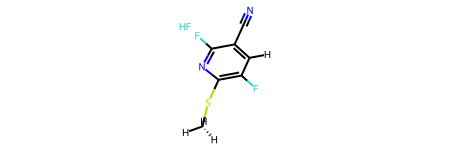

In [3]:
mol

In [4]:
axis_atom = mol.GetAtomWithIdx(0)
origin_atom = mol.GetAtomWithIdx(2)
plane_atom = mol.GetAtomWithIdx(3)
rotation, translation = align_to_axes(position(origin_atom), position(axis_atom), position(plane_atom), origin = [1, 1, 1])

In [5]:
import pymolviz as pmv
pmv.Arrows([0, 0, 0, *a, 0,0,0,*b], color=["red", "green"]).write("test.py")

(2, 3) (2, 3) (2, 3)


In [6]:
pmv.Points(position(plane_atom)).write("plane_atom.py")

In [7]:
rotation

array([[ 0.34372707,  0.76005166,  0.55151897],
       [ 0.0813855 , -0.60920445,  0.78882592],
       [ 0.93553627, -0.22625518, -0.27125724]])

In [8]:
transform(mol, rotation, translation)

In [9]:
Chem.MolToPDBFile(mol, "aligned3.pdb")